In [21]:
import pandas as pd
import numpy as np
import imblearn
from imblearn.under_sampling import NearMiss
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LassoCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.feature_selection import SequentialFeatureSelector
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

# Creating the Dataframe

In [2]:
df = pd.read_csv('diabetes.csv')
undersample = NearMiss(version=1)
X = df.loc[:, df.columns != 'Diabetes_binary']
y = df.loc[:, df.columns == 'Diabetes_binary']
X, y = undersample.fit_resample(X, y)


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state=42)
scaler = StandardScaler()
scaler.fit(X_train)
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

df_undersampled_train = pd.DataFrame(X_train_scaled, columns = X.columns)
df_undersampled_train['Diabetes_binary'] = y_train
df_undersampled_train.head()

df_undersampled_test = pd.DataFrame(X_test_scaled, columns = X.columns)
df_undersampled_test['Diabetes_binary'] = y_test
df_undersampled_test.head()


,HighBP,HighChol,CholCheck,BMI,Smoker,Stroke,HeartDiseaseorAttack,PhysActivity,Fruits,Veggies,...,NoDocbcCost,GenHlth,MentHlth,PhysHlth,DiffWalk,Sex,Age,Education,Income,Diabetes_binary
0,-1.212894,0.876922,0.074482,-1.061978,1.158253,-0.225623,-0.384172,0.514775,-1.494245,0.418265,...,-0.237966,1.255723,-0.332699,-0.446002,-0.485309,-1.036097,0.367769,-1.162526,-0.619867,NaN
1,-1.212894,-1.140353,0.074482,0.377975,1.158253,-0.225623,-0.384172,0.514775,0.669234,0.418265,...,-0.237966,-0.639948,-0.332699,-0.446002,-0.485309,0.965161,-2.279439,0.864409,0.843982,NaN
2,0.824475,0.876922,0.074482,1.017954,-0.863369,-0.225623,-0.384172,0.514775,0.669234,0.418265,...,-0.237966,0.307887,-0.332699,-0.220989,-0.485309,0.965161,-0.073432,0.864409,0.843982,NaN
3,-1.212894,0.876922,0.074482,0.377975,-0.863369,-0.225623,-0.384172,0.514775,0.669234,0.418265,...,-0.237966,-0.639948,-0.332699,-0.446002,-0.485309,-1.036097,-0.514634,0.864409,0.356032,NaN
4,0.824475,-1.140353,0.074482,2.777896,-0.863369,-0.225623,-0.384172,0.514775,0.669234,0.418265,...,-0.237966,1.255723,4.162593,0.679064,2.060543,0.965161,-1.397036,0.864409,-1.595766,0.0


# Creating The Wrapper Method With KNN As The Estimator

* Using both forward and backward to see which direction yields better results

In [3]:
sfs_forward = SequentialFeatureSelector(KNeighborsClassifier(n_neighbors=3), n_features_to_select=9, n_jobs=-1)
sfs_forward.fit(X_train_scaled, y_train.values.ravel())


sfs_backward = SequentialFeatureSelector(KNeighborsClassifier(n_neighbors=3), n_features_to_select=9,direction = 'backward', n_jobs=-1)
sfs_backward.fit(X_train_scaled, y_train.values.ravel())

cols_idxs_forward = sfs_forward.get_support(indices=True)
cols_idxs_forward

forward_selection_train = df_undersampled_train.iloc[:, cols_idxs_forward]
print(forward_selection_train)
print(cols_idxs_forward)

cols_idxs_backward = sfs_backward.get_support(indices=True)
cols_idxs_backward

backward_selection_train = df_undersampled_train.iloc[:, cols_idxs_backward]
print(backward_selection_train)
print(cols_idxs_backward)

forward_selection_test = df_undersampled_test.iloc[:, cols_idxs_forward]
backward_selection_test = df_undersampled_test.iloc[:, cols_idxs_backward]

       HeartDiseaseorAttack  PhysActivity    Fruits  AnyHealthcare   GenHlth  \
0                 -0.384172      0.514775  0.669234       0.147309 -0.639948   
1                  2.603001     -1.942597  0.669234       0.147309  1.255723   
2                 -0.384172      0.514775 -1.494245       0.147309 -0.639948   
3                 -0.384172      0.514775  0.669234       0.147309 -1.587783   
4                 -0.384172     -1.942597  0.669234       0.147309 -0.639948   
...                     ...           ...       ...            ...       ...   
49479             -0.384172     -1.942597  0.669234       0.147309  0.307887   
49480             -0.384172      0.514775 -1.494245       0.147309 -0.639948   
49481             -0.384172      0.514775  0.669234       0.147309 -0.639948   
49482             -0.384172      0.514775  0.669234       0.147309 -0.639948   
49483             -0.384172      0.514775  0.669234       0.147309 -0.639948   

       MentHlth  PhysHlth  DiffWalk    

# Creating The Wrapper Method With Random Forest Classifier As the Estimator

* Using both forward and backward to see which direction yields better results

In [4]:
sfs_forward_rf = SequentialFeatureSelector(RandomForestClassifier(), n_features_to_select=9, n_jobs=-1)
sfs_forward_rf.fit(X_train_scaled, y_train.values.ravel())


sfs_backward_rf = SequentialFeatureSelector(RandomForestClassifier(), n_features_to_select=9,direction = 'backward', n_jobs=-1)
sfs_backward_rf.fit(X_train_scaled, y_train.values.ravel())

cols_idxs_forward_rf = sfs_forward_rf.get_support(indices=True)
cols_idxs_forward_rf

forward_selection_train_rf = df_undersampled_train.iloc[:, cols_idxs_forward_rf]
print(forward_selection_train_rf)
print(cols_idxs_forward_rf)

cols_idxs_backward_rf = sfs_backward_rf.get_support(indices=True)
cols_idxs_backward_rf

backward_selection_train_rf = df_undersampled_train.iloc[:, cols_idxs_backward_rf]
print(backward_selection_train_rf)
print(cols_idxs_backward_rf)

forward_selection_test_rf = df_undersampled_test.iloc[:, cols_idxs_forward_rf]
backward_selection_test_rf = df_undersampled_test.iloc[:, cols_idxs_backward_rf]

            BMI    Stroke  HeartDiseaseorAttack  PhysActivity   Veggies  \
0     -1.221972 -0.225623             -0.384172      0.514775  0.418265   
1      0.697964 -0.225623              2.603001     -1.942597 -2.390830   
2     -1.061978 -0.225623             -0.384172      0.514775  0.418265   
3     -0.581994 -0.225623             -0.384172      0.514775  0.418265   
4      1.177948 -0.225623             -0.384172     -1.942597 -2.390830   
...         ...       ...                   ...           ...       ...   
49479 -0.262004 -0.225623             -0.384172     -1.942597  0.418265   
49480 -0.262004 -0.225623             -0.384172      0.514775  0.418265   
49481 -1.061978  4.432171             -0.384172      0.514775  0.418265   
49482  0.057985 -0.225623             -0.384172      0.514775  0.418265   
49483  0.857959 -0.225623             -0.384172      0.514775  0.418265   

        GenHlth  MentHlth  PhysHlth    Income  
0     -0.639948 -0.332699 -0.446002  0.356032  
1  

# Testing The Forward KNN Generated Feature Selection

Random Forest Train Accuracy: 0.855 & Test Accuracy: 0.855

Train Confusion Matrix:
[[22893  1852]
 [ 5305 19434]]

Test Confusion Matrix:
[[9764  837]
 [2232 8375]]

Train Classification Report:
              precision    recall  f1-score   support

         0.0       0.81      0.93      0.86     24745
         1.0       0.91      0.79      0.84     24739

    accuracy                           0.86     49484
   macro avg       0.86      0.86      0.85     49484
weighted avg       0.86      0.86      0.85     49484

Test Classification Report:
              precision    recall  f1-score   support

         0.0       0.81      0.92      0.86     10601
         1.0       0.91      0.79      0.85     10607

    accuracy                           0.86     21208
   macro avg       0.86      0.86      0.85     21208
weighted avg       0.86      0.86      0.85     21208



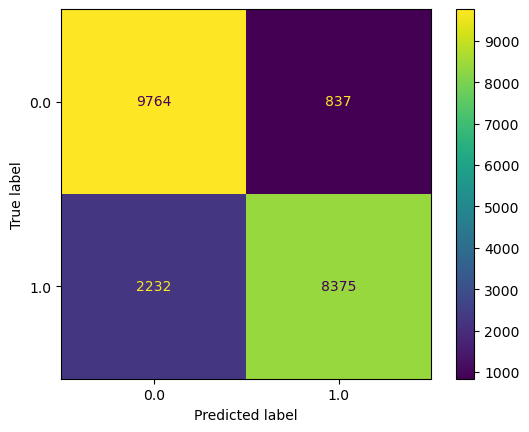

In [22]:
rf_wrapper = RandomForestClassifier(criterion = 'entropy',max_features = 'sqrt', max_depth = 15, min_samples_split = 2,min_samples_leaf=17, random_state=42)
rf_wrapper.fit(forward_selection_train, y_train.values.ravel())

rfw_train_pred = rf_wrapper.predict(forward_selection_train)
rfw_train_score = accuracy_score(y_train, rfw_train_pred)
rfw_test_pred = rf_wrapper.predict(forward_selection_test)
rfw_test_score = accuracy_score(y_test, rfw_test_pred)

rfw_conf_train = confusion_matrix(y_train.values.ravel(), rfw_train_pred)
rfw_conf_test = confusion_matrix(y_test.values.ravel(), rfw_test_pred)

print(f'Random Forest Train Accuracy: {np.round(rfw_train_score, 3)} & Test Accuracy: {np.round(rfw_test_score, 3)}\n')

print(f'Train Confusion Matrix:\n{rfw_conf_train}\n\nTest Confusion Matrix:\n{rfw_conf_test}\n')
print(f'Train Classification Report:\n{classification_report(y_train, rfw_train_pred)}\nTest Classification Report:\n{classification_report(y_test, rfw_test_pred)}')

disp = ConfusionMatrixDisplay(rfw_conf_test, display_labels = rf_wrapper.classes_)
disp.plot()
plt.show()

# Testing The Backward KNN Generated Feature Selection

Random Forest Train Accuracy: 0.876 & Test Accuracy: 0.87

Train Confusion Matrix:
[[23106  1639]
 [ 4487 20252]]

Test Confusion Matrix:
[[9836  765]
 [1989 8618]]

Train Classification Report:
              precision    recall  f1-score   support

         0.0       0.84      0.93      0.88     24745
         1.0       0.93      0.82      0.87     24739

    accuracy                           0.88     49484
   macro avg       0.88      0.88      0.88     49484
weighted avg       0.88      0.88      0.88     49484

Test Classification Report:
              precision    recall  f1-score   support

         0.0       0.83      0.93      0.88     10601
         1.0       0.92      0.81      0.86     10607

    accuracy                           0.87     21208
   macro avg       0.88      0.87      0.87     21208
weighted avg       0.88      0.87      0.87     21208



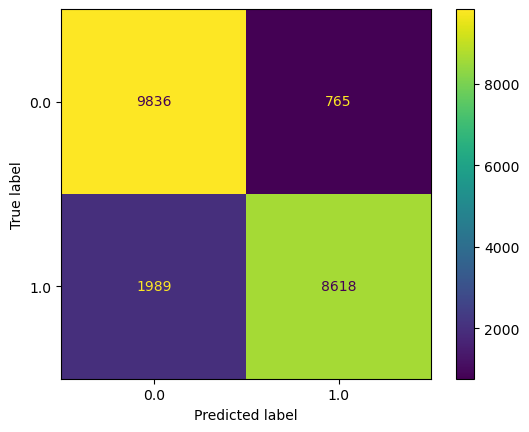

In [24]:
rf_wrapper = RandomForestClassifier(criterion = 'entropy',max_features = 'sqrt', max_depth = 15, min_samples_split = 2,min_samples_leaf=17, random_state=42)
rf_wrapper.fit(backward_selection_train, y_train.values.ravel())

rfw_train_pred = rf_wrapper.predict(backward_selection_train)
rfw_train_score = accuracy_score(y_train, rfw_train_pred)
rfw_test_pred = rf_wrapper.predict(backward_selection_test)
rfw_test_score = accuracy_score(y_test, rfw_test_pred)

rfw_conf_train = confusion_matrix(y_train.values.ravel(), rfw_train_pred)
rfw_conf_test = confusion_matrix(y_test.values.ravel(), rfw_test_pred)

print(f'Random Forest Train Accuracy: {np.round(rfw_train_score, 3)} & Test Accuracy: {np.round(rfw_test_score, 3)}\n')

print(f'Train Confusion Matrix:\n{rfw_conf_train}\n\nTest Confusion Matrix:\n{rfw_conf_test}\n')
print(f'Train Classification Report:\n{classification_report(y_train, rfw_train_pred)}\nTest Classification Report:\n{classification_report(y_test, rfw_test_pred)}')

disp = ConfusionMatrixDisplay(rfw_conf_test, display_labels = rf_wrapper.classes_)
disp.plot()
plt.show()

# Testing The Forward Random Forest Generated Feature Selection

Random Forest Train Accuracy: 0.879 & Test Accuracy: 0.873

Train Confusion Matrix:
[[23093  1652]
 [ 4342 20397]]

Test Confusion Matrix:
[[9823  778]
 [1919 8688]]

Train Classification Report:
              precision    recall  f1-score   support

         0.0       0.84      0.93      0.89     24745
         1.0       0.93      0.82      0.87     24739

    accuracy                           0.88     49484
   macro avg       0.88      0.88      0.88     49484
weighted avg       0.88      0.88      0.88     49484

Test Classification Report:
              precision    recall  f1-score   support

         0.0       0.84      0.93      0.88     10601
         1.0       0.92      0.82      0.87     10607

    accuracy                           0.87     21208
   macro avg       0.88      0.87      0.87     21208
weighted avg       0.88      0.87      0.87     21208



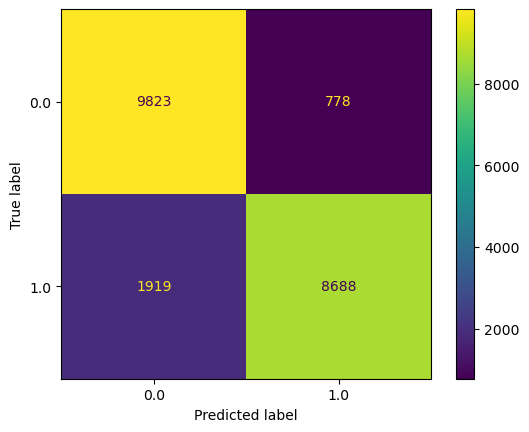

In [25]:
rf_wrapper = RandomForestClassifier(criterion = 'entropy',max_features = 'sqrt', max_depth = 15, min_samples_split = 2,min_samples_leaf=17, random_state=42)
rf_wrapper.fit(forward_selection_train_rf, y_train.values.ravel())

rfw_train_pred = rf_wrapper.predict(forward_selection_train_rf)
rfw_train_score = accuracy_score(y_train, rfw_train_pred)
rfw_test_pred = rf_wrapper.predict(forward_selection_test_rf)
rfw_test_score = accuracy_score(y_test, rfw_test_pred)

rfw_conf_train = confusion_matrix(y_train.values.ravel(), rfw_train_pred)
rfw_conf_test = confusion_matrix(y_test.values.ravel(), rfw_test_pred)

print(f'Random Forest Train Accuracy: {np.round(rfw_train_score, 3)} & Test Accuracy: {np.round(rfw_test_score, 3)}\n')

print(f'Train Confusion Matrix:\n{rfw_conf_train}\n\nTest Confusion Matrix:\n{rfw_conf_test}\n')
print(f'Train Classification Report:\n{classification_report(y_train, rfw_train_pred)}\nTest Classification Report:\n{classification_report(y_test, rfw_test_pred)}')

disp = ConfusionMatrixDisplay(rfw_conf_test, display_labels = rf_wrapper.classes_)
disp.plot()
plt.show()

# Testing Backward Random Forest Generated Feature Selection

Random Forest Train Accuracy: 0.869 & Test Accuracy: 0.867

Train Confusion Matrix:
[[22934  1811]
 [ 4666 20073]]

Test Confusion Matrix:
[[9796  805]
 [2020 8587]]

Train Classification Report:
              precision    recall  f1-score   support

         0.0       0.83      0.93      0.88     24745
         1.0       0.92      0.81      0.86     24739

    accuracy                           0.87     49484
   macro avg       0.87      0.87      0.87     49484
weighted avg       0.87      0.87      0.87     49484

Test Classification Report:
              precision    recall  f1-score   support

         0.0       0.83      0.92      0.87     10601
         1.0       0.91      0.81      0.86     10607

    accuracy                           0.87     21208
   macro avg       0.87      0.87      0.87     21208
weighted avg       0.87      0.87      0.87     21208



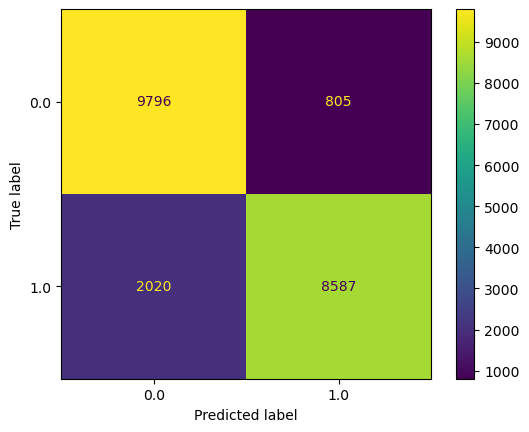

In [26]:
rf_wrapper = RandomForestClassifier(criterion = 'entropy',max_features = 'sqrt', max_depth = 15, min_samples_split = 2,min_samples_leaf=17, random_state=42)
rf_wrapper.fit(backward_selection_train_rf, y_train.values.ravel())

rfw_train_pred = rf_wrapper.predict(backward_selection_train_rf)
rfw_train_score = accuracy_score(y_train, rfw_train_pred)
rfw_test_pred = rf_wrapper.predict(backward_selection_test_rf)
rfw_test_score = accuracy_score(y_test, rfw_test_pred)

rfw_conf_train = confusion_matrix(y_train.values.ravel(), rfw_train_pred)
rfw_conf_test = confusion_matrix(y_test.values.ravel(), rfw_test_pred)

print(f'Random Forest Train Accuracy: {np.round(rfw_train_score, 3)} & Test Accuracy: {np.round(rfw_test_score, 3)}\n')

print(f'Train Confusion Matrix:\n{rfw_conf_train}\n\nTest Confusion Matrix:\n{rfw_conf_test}\n')
print(f'Train Classification Report:\n{classification_report(y_train, rfw_train_pred)}\nTest Classification Report:\n{classification_report(y_test, rfw_test_pred)}')

disp = ConfusionMatrixDisplay(rfw_conf_test, display_labels = rf_wrapper.classes_)
disp.plot()
plt.show()

# Results

* Of all the directions and estimators used the best feature selection was the forward random forest sfs.


    * The Accuracy of the features using the best model from problem 1:
        * Training: 0.879
        * Testing: 0.873
        
    * The 9 Features that were selected are:
        * BMI
        * Stroke
        * HeartDiseaseorAttack
        * PhysActivity
        * Veggies
        * GenHlth
        * MentHlth
        * PhysHlth
        * Income